<a href="https://colab.research.google.com/github/jet981217/COVID19_PREDICTION_VARIOUS_AI_COMPARISON/blob/master/COVID_19_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#딥러닝 시작하자#일주일단위
!pip install pandas
!pip install requests
!pip install scikit-learn
 
import keras
import codecs
import io
import sklearn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
import re
import os
from google.colab import drive
from keras import models
from keras import layers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
 
 
def Model_Build_One_Hidden(a_layer = None):
  Model = models.Sequential()
  Model.add(layers.Flatten(input_shape=(train_input.shape[1],)))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return Model
 
def Model_Build_Two_Hidden(a_layer = None):
  Model = models.Sequential()
  Model.add(layers.Flatten(input_shape=(train_input.shape[1],)))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'sigmoid'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return Model
 
 
def Model_Build_Three_Hidden(a_layer = None):
  Model = models.Sequential()
  Model.add(layers.Flatten(input_shape=(train_input.shape[1],)))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'sigmoid'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'sigmoid'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return Model
 
drive.mount('/content/drive')
"""
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_WITHOUTRESTRICTION.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_TARGET.csv")
tr.head()
"""
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/DAILY_DATA_WITHOUT_NEXTDAY.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/DAILY_7ADDED_TARGET.csv")
tr.head()
 
data = dt.to_numpy()
target = tr.to_numpy()
 

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2)

mean  = train_input.mean(axis=0)
train_input = train_input.astype('float64')
train_input -=mean
std = train_input.std(axis=0)
train_input /= std

NUM_CHECK_INPUT =[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1]
NUM_CHECK_INPUT = np.array(NUM_CHECK_INPUT)
NUM_CHECK_INPUT = NUM_CHECK_INPUT.astype('float64')
NUM_CHECK_INPUT -= mean
NUM_CHECK_INPUT /= std
NUM_CHECK_INPUT = np.reshape(NUM_CHECK_INPUT, (1,21))


test_input = test_input.astype('float64')
test_input -= mean
test_input /= std

#전체 데이터로 다시 훈련


Model_One = Model_Build_One_Hidden(keras.layers.Dropout(0.3))#keras.layers.Dropout(0.1)
#Model_One.summary()
history_One = Model_One.fit(train_input, train_target, epochs=300, verbose=0)
Model_One_mse_score, Model_One_mae_score = Model_One.evaluate(test_input, test_target)



print(Model_One.predict([NUM_CHECK_INPUT]))
print(Model_One_mae_score)

plt.title("One Layer MAE")
plt.plot(history_One.history['mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train'])
plt.show()

 
Model_Two = Model_Build_Two_Hidden(keras.layers.Dropout(0.2))#keras.layers.Dropout(0.2)
#Model_Two.summary()
history_Two = Model_Two.fit(train_input, train_target, epochs=300, verbose=0)
Model_Two_mse_score, Model_Two_mae_score = Model_Two.evaluate(test_input, test_target)
#print(Model_Two.predict([[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1]]))

print(Model_Two.predict([NUM_CHECK_INPUT]))
print(Model_Two_mae_score)
 
 
plt.title("Two Layer MAE")
plt.plot(history_Two.history['mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train'])
plt.show()
 

Model_Three = Model_Build_Three_Hidden(keras.layers.Dropout(0.2))#keras.layers.Dropout(0.3)
#Model_Three.summary()
history_Three = Model_Three.fit(train_input, train_target, epochs=300, verbose=0)
Model_Three_mse_score, Model_Three_mae_score = Model_Three.evaluate(test_input, test_target)
#print(Model_Three.predict([[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1]]))

print(Model_Three.predict([NUM_CHECK_INPUT]))
print(Model_Three_mae_score)
 
 
plt.title("Three Layer MAE")
plt.plot(history_Three.history['mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train'])
plt.show()
 

In [ ]:
#머신러닝모델
!pip install pandas
!pip install requests
#!pip install kreas
!pip install scikit-learn
import io
 
from sklearn.model_selection import train_test_split
#from tensorflow import kreas
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import requests
 
from google.colab import drive
 
drive.mount('/content/drive')
 
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_WITHOUTRESTRICTION.csv")
dt.head()
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_TARGET.csv")
tr.head()
 
 
data = dt.to_numpy()
target = tr.to_numpy()
 
 
train_input, test_input, train_target, test_target = train_test_split(data, target)
 
from sklearn.linear_model import LinearRegression
 
lr = LinearRegression()
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
 
poly = PolynomialFeatures(degree = 1)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
 
 
ss = StandardScaler()
ss.fit(train_poly)
train_scaled =ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
 
from sklearn.linear_model import Ridge
  #ridge = Ridge()
  #ridge.fit(train_scaled, train_target)
 
  #print(ridge.score(train_scaled, train_target))
  #print(ridge.score(test_scaled, test_target))
 
 
params = {'alpha': randint(0.001, 1),
          }
 
 
gs = RandomizedSearchCV(Ridge(), params, n_iter = 100, n_jobs=-1)
gs.fit(train_scaled, train_target)
 
dt = gs.best_estimator_
 
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
 
val = ss.transform(poly.transform([[1454,1451,1252,1278,1784,1838,1630,3]]))
 
print(dt.predict(val)/7)
 
#Data.close
#Target.close

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0.9610584743302023
0.9310423568466791
[[1734.59166903]]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/276
13/13 [==============================] - 14s 2ms/step - loss: 219683.5603 - mae: 342.7139
Epoch 2/276
13/13 [==============================] - 0s 2ms/step - loss: 249631.1908 - mae: 374.9034
Epoch 3/276
13/13 [==============================] - 0s 2ms/step - loss: 265560.2891 - mae: 381.4209
Epoch 4/276
13/13 [==============================] - 0s 2ms/step - loss: 230615.7863 - mae: 353.1352
Epoch 5/276
13/13 [==============================] - 0s 2ms/step - loss: 245004.2076 - mae: 361.2856
Epoch 6/276
13/13 [==============================] - 0s 2ms/step - loss: 249339.5938 - mae: 370.9423
Epoch 7/276
13/13 [==============================] - 0s 1ms/step - loss: 250876.1350 - mae: 369.7889
Epoch 8/276
13/13 [==============================] - 0s 2ms/step - loss: 262708.4163 - mae: 386.4888
Epoch 9/276
13/13 [==============================] - 0s 2ms/st

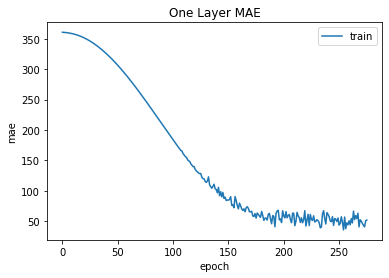

Epoch 1/288
13/13 [==============================] - 1s 2ms/step - loss: 219042.5346 - mae: 337.3419
Epoch 2/288
13/13 [==============================] - 0s 2ms/step - loss: 263851.0525 - mae: 379.1436
Epoch 3/288
13/13 [==============================] - 0s 2ms/step - loss: 228947.0748 - mae: 349.6840
Epoch 4/288
13/13 [==============================] - 0s 2ms/step - loss: 225665.2746 - mae: 356.2466
Epoch 5/288
13/13 [==============================] - 0s 2ms/step - loss: 224011.5033 - mae: 356.9422
Epoch 6/288
13/13 [==============================] - 0s 2ms/step - loss: 234109.7188 - mae: 362.0694
Epoch 7/288
13/13 [==============================] - 0s 2ms/step - loss: 245694.6551 - mae: 368.4305
Epoch 8/288
13/13 [==============================] - 0s 2ms/step - loss: 241031.6540 - mae: 364.9797
Epoch 9/288
13/13 [==============================] - 0s 2ms/step - loss: 246017.9699 - mae: 373.8797
Epoch 10/288
13/13 [==============================] - 0s 2ms/step - loss: 252940.2522 - mae

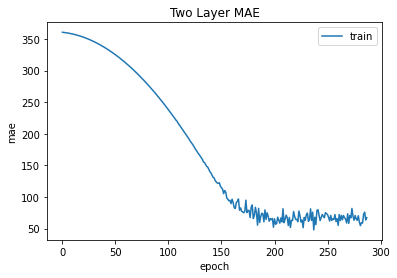

Epoch 1/264
13/13 [==============================] - 2s 3ms/step - loss: 263248.8638 - mae: 388.0301
Epoch 2/264
13/13 [==============================] - 0s 2ms/step - loss: 211906.2879 - mae: 340.0315
Epoch 3/264
13/13 [==============================] - 0s 2ms/step - loss: 261408.3917 - mae: 379.8106
Epoch 4/264
13/13 [==============================] - 0s 2ms/step - loss: 238379.9319 - mae: 370.9381
Epoch 5/264
13/13 [==============================] - 0s 2ms/step - loss: 255488.7366 - mae: 371.4819
Epoch 6/264
13/13 [==============================] - 0s 2ms/step - loss: 194679.6295 - mae: 327.9371
Epoch 7/264
13/13 [==============================] - 0s 3ms/step - loss: 252457.4319 - mae: 371.7254
Epoch 8/264
13/13 [==============================] - 0s 2ms/step - loss: 223990.5201 - mae: 350.0389
Epoch 9/264
13/13 [==============================] - 0s 2ms/step - loss: 216532.8092 - mae: 350.6411
Epoch 10/264
13/13 [==============================] - 0s 2ms/step - loss: 236286.0926 - mae

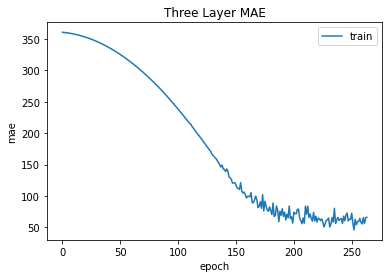

In [ ]:
#딥러닝 시작하자#일주일단위#그리드서치 추가중
!pip install pandas
!pip install requests
!pip install scikit-learn
 
import keras
import codecs
import io
import sklearn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
import re
import os
from google.colab import drive
from keras import models
from keras import layers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
 
def Model_Build_One_Hidden(Drop_vals, optimizer_vals):
  Model = models.Sequential()
  Model.add(layers.Flatten(input_shape=(train_input.shape[1],)))
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(keras.layers.Dropout(Drop_vals))  
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_vals, loss='mse', metrics=['mae'])
  return Model
 
def Model_Build_Two_Hidden(Drop_vals, optimizer_vals):
  Model = models.Sequential()
  Model.add(layers.Flatten(input_shape=(train_input.shape[1],)))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(keras.layers.Dropout(Drop_vals))  
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'sigmoid'))
  Model.add(keras.layers.Dropout(Drop_vals)) 
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_vals, loss='mse', metrics=['mae'])
  return Model
 
 
def Model_Build_Three_Hidden(Drop_vals, optimizer_vals):
  Model = models.Sequential()
  Model.add(layers.Flatten(input_shape=(train_input.shape[1],)))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'sigmoid'))
  Model.add(keras.layers.Dropout(Drop_vals))  
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(keras.layers.Dropout(Drop_vals))  
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'sigmoid'))
  Model.add(keras.layers.Dropout(Drop_vals))  
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer=optimizer_vals, loss='mse', metrics=['mae'])
  return Model
 
drive.mount('/content/drive')
"""
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_WITHOUTRESTRICTION.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_TARGET.csv")
tr.head()
"""
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/DAILY_DATA_WITHOUT_NEXTDAY.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/DAILY_7ADDED_TARGET.csv")
tr.head()
 
data = dt.to_numpy()
target = tr.to_numpy()
 
 
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state = 42)
 
mean  = train_input.mean(axis=0)
train_input = train_input.astype('float64')
train_input -=mean
std = train_input.std(axis=0)
train_input /= std
 
NUM_CHECK_INPUT =[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1]
NUM_CHECK_INPUT = np.array(NUM_CHECK_INPUT)
NUM_CHECK_INPUT = NUM_CHECK_INPUT.astype('float64')
NUM_CHECK_INPUT -= mean
NUM_CHECK_INPUT /= std
NUM_CHECK_INPUT = np.reshape(NUM_CHECK_INPUT, (1,21))
 
 
test_input = test_input.astype('float64')
test_input -= mean
test_input /= std
 
 
from scipy.stats import uniform, randint
 
#ANN
regressor_One = KerasRegressor(build_fn = Model_Build_One_Hidden)
params = {'Drop_vals': uniform(0,0.3), 
          'epochs': randint(100,300),
          'optimizer_vals' : ['adam','rmsprop'],
          }
 
grid_One = RandomizedSearchCV(estimator = regressor_One, param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, refit=True, verbose=0)
history_One = grid_One.fit(train_input, train_target, verbose=0)

print(print('GridSearchCV 최적 파라미터:', grid_One.best_params_))

Model_One = grid_One.best_estimator_.build_fn(grid_One.best_params_.get('Drop_vals'), grid_One.best_params_.get('optimizer_vals'))
history_One = Model_One.fit(train_input, train_target, epochs= grid_One.best_params_.get('epochs'), verbose=0)

Model_One_mse_score, Model_One_mae_score = Model_One.evaluate(test_input, test_target)

 
print(Model_One.predict([NUM_CHECK_INPUT]))
print(Model_One_mae_score)
 
plt.title("One Layer MAE")
plt.plot(history_One.history['mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train'])
plt.show()

#2-레이어 DNN
regressor_Two = KerasRegressor(build_fn = Model_Build_Two_Hidden)
params = {'Drop_vals': uniform(0,0.3), 
          'epochs': randint(100,300),
          'optimizer_vals' : ['adam','rmsprop'],
          }
 
grid_Two = RandomizedSearchCV(estimator = regressor_Two, param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, refit=True, verbose=0)
history_Two = grid_Two.fit(train_input, train_target, verbose=0)

print(print('GridSearchCV 최적 파라미터:', grid_Two.best_params_))

Model_Two = grid_Two.best_estimator_.build_fn(grid_Two.best_params_.get('Drop_vals'), grid_Two.best_params_.get('optimizer_vals'))
history_Two = Model_Two.fit(train_input, train_target, epochs= grid_Two.best_params_.get('epochs'), verbose=0)

Model_Two_mse_score, Model_Two_mae_score = Model_Two.evaluate(test_input, test_target)

print(Model_Two.predict([NUM_CHECK_INPUT]))
print(Model_Two_mae_score)

plt.title("Two Layer MAE")
plt.plot(history_Two.history['mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train'])
plt.show()
 
#3-레이어 DNN
regressor_Three = KerasRegressor(build_fn = Model_Build_Three_Hidden)
params = {'Drop_vals': uniform(0,0.3), 
          'epochs': randint(100,300),
          'optimizer_vals' : ['adam','rmsprop'],
          }

grid_Three = RandomizedSearchCV(estimator = regressor_Three, param_distributions=params, 
                              scoring = 'neg_mean_squared_error',  cv = 10, n_jobs = -1, refit=True, verbose=0)
history_Three = grid_Three.fit(train_input, train_target, verbose=0)

print(print('GridSearchCV 최적 파라미터:', grid_Three.best_params_))

Model_Three = grid_Three.best_estimator_.build_fn(grid_Three.best_params_.get('Drop_vals'), grid_Three.best_params_.get('optimizer_vals'))
history_Three = Model_Three.fit(train_input, train_target, epochs= grid_Three.best_params_.get('epochs'), verbose=0)

Model_Three_mse_score, Model_Three_mae_score = Model_Three.evaluate(test_input, test_target)

print(Model_Three.predict([NUM_CHECK_INPUT]))
print(Model_Three_mae_score)

plt.title("Three Layer MAE")
plt.plot(history_Three.history['mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train'])
plt.show()
 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 22)                0         
_________________________________________________________________
batch_normalization_102 (Bat (None, 22)                88        
_________________________________________________________________
dense_102 (Dense)            (None, 64)                1472      
_________________________________________________________________
batch_normalization_103 (Bat (None, 64)                256       
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 65        
Total params: 1,881
Trainable params: 1,709
Non-trainable params: 172
____________________________________________________

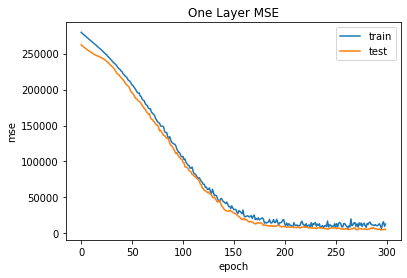

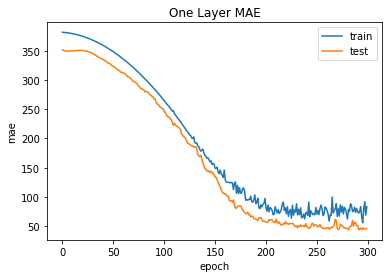

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_34 (Flatten)         (None, 22)                0         
_________________________________________________________________
batch_normalization_104 (Bat (None, 22)                88        
_________________________________________________________________
dense_104 (Dense)            (None, 64)                1472      
_________________________________________________________________
batch_normalization_105 (Bat (None, 64)                256       
_________________________________________________________________
dense_105 (Dense)            (None, 64)                4160      
_________________________________________________________________
batch_normalization_106 (Bat (None, 64)                256       
_________________________________________________________________
dense_106 (Dense)            (None, 1)               

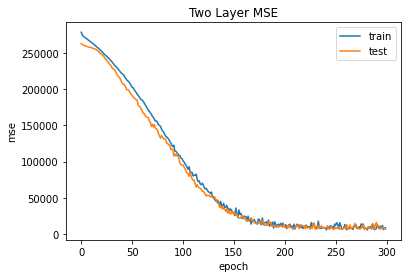

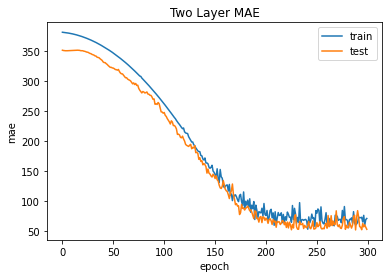

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_35 (Flatten)         (None, 22)                0         
_________________________________________________________________
batch_normalization_107 (Bat (None, 22)                88        
_________________________________________________________________
dense_107 (Dense)            (None, 64)                1472      
_________________________________________________________________
batch_normalization_108 (Bat (None, 64)                256       
_________________________________________________________________
dense_108 (Dense)            (None, 64)                4160      
_________________________________________________________________
batch_normalization_109 (Bat (None, 64)                256       
_________________________________________________________________
dense_109 (Dense)            (None, 64)              

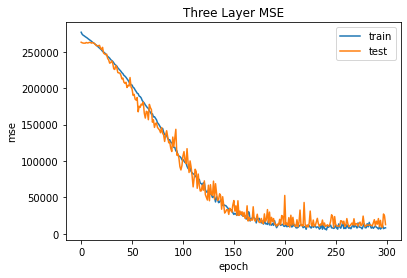

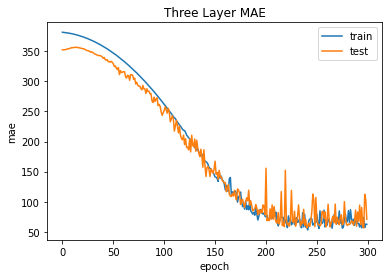

In [ ]:
#딥러닝 시작하자#하루단위
!pip install pandas
!pip install requests
!pip install scikit-learn
 
import keras
import codecs
import io
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
import re
import os
from google.colab import drive
from keras import models
from keras import layers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
 
 
def Model_Build_One_Hidden(a_layer = None):
  Model = models.Sequential()
  Model.add(layers.Flatten(input_shape=(train_input.shape[1],)))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return Model
 
def Model_Build_Two_Hidden(a_layer = None):
  Model = models.Sequential()
  Model.add(layers.Flatten(input_shape=(train_input.shape[1],)))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'sigmoid'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return Model

 
def Model_Build_Three_Hidden(a_layer = None):
  Model = models.Sequential()
  Model.add(layers.Flatten(input_shape=(train_input.shape[1],)))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'sigmoid'))
  Model.add(BatchNormalization())

  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return Model

 
drive.mount('/content/drive')
"""
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_WITHOUTRESTRICTION.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_TARGET.csv")
tr.head()
"""
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/DAILY_DATA.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/DAILY_TARGET.csv")
tr.head()
 
data = dt.to_numpy()
target = tr.to_numpy()
 
train_input, test_input, train_target, test_target = train_test_split(data, target)
 
 
Model_One = Model_Build_One_Hidden(keras.layers.Dropout(0.1))#
Model_One.summary()
history_one = Model_One.fit(train_input, train_target, epochs=300, verbose=0, validation_data=(test_input, test_target))
 
#print(Model.predict([[1454,1451,1252,1278,1784,1838,1630,3]])/7)
print(Model_One.predict([[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1,0]]))

plt.title("One Layer MSE")
plt.plot(history_one.history['loss'])
plt.plot(history_one.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend(['train', 'test'])
plt.show()

plt.title("One Layer MAE") 
plt.plot(history_one.history['mae'])
plt.plot(history_one.history['val_mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train', 'test'])
plt.show()


Model_Two = Model_Build_Two_Hidden(keras.layers.Dropout(0.1))#
Model_Two.summary()
history_Two = Model_Two.fit(train_input, train_target, epochs=300, verbose=0, validation_data=(test_input, test_target))
 
#print(Model.predict([[1454,1451,1252,1278,1784,1838,1630,3]])/7)
print(Model_Two.predict([[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1,0]]))

plt.title("Two Layer MSE")
plt.plot(history_Two.history['loss'])
plt.plot(history_Two.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend(['train', 'test'])
plt.show()

plt.title("Two Layer MAE") 
plt.plot(history_Two.history['mae'])
plt.plot(history_Two.history['val_mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train', 'test'])
plt.show()

Model_Three = Model_Build_Three_Hidden(keras.layers.Dropout(0.1))
Model_Three.summary()
history_Three = Model_Three.fit(train_input, train_target, epochs=300, verbose=0, validation_data=(test_input, test_target))
print(Model_Three.predict([[1629,0,0,1486,0,0,1318,0,1,1365,-2,1,1896,-1,1,1674,0,1,1710,0,1,0]]))

plt.title("Three Layer MSE")
plt.plot(history_Three.history['loss'])
plt.plot(history_Three.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend(['train', 'test'])
plt.show()
 
plt.title("Three Layer MAE") 
plt.plot(history_Three.history['mae'])
plt.plot(history_Three.history['val_mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
#키워드 분류 일주일단위
!pip install pandas
!pip install requests
#!pip install kreas
!pip install scikit-learn
!pip install tensorflow
 
import codecs
import io
from tqdm import tqdm
from sklearn.model_selection import train_test_split
#from tensorflow import kreas
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import requests
import re
#from tensorflow import kreas
import os
from google.colab import drive
 
 
def File_Access(File_To_Write, poslist, neglist, path, file_name,temp,count,vals):
  c = path + "/" + file_name
  
  news_labels = pd.read_csv(c)
  news_labels.head()
  news_labels.to_numpy()
  sum = 0
  for member in Tag_Search(poslist, neglist, news_labels):
    sum += member
 
  print(sum)
 
  if(count == 7):
    sum+=vals
    if temp == 0:
      File_To_Write.write(str(sum)+"\n")
    else:
      File_To_Write.write(str(sum))
  
  return sum
 
def Tag_Search(poslist, neglist, lists):
  label_lists = []
  for names in lists:
    temp_label = 0
    sub_names = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', names)
    is_positive = False
    is_negative = False
 
    for positive_words in poslist:
      if sub_names.find(positive_words) == 1:
        is_positive = True
        break
    for negative_words in neglist:
      if sub_names.find(negative_words) == 1:
        is_negative = True
        break
    
    if (is_positive == False and is_negative == False):
      temp_label = 0
    if is_positive == True:
      temp_label = 1
    elif is_negative == True:
      temp_label = -1
 
    label_lists.append(temp_label)
  
  return label_lists
    
 
 
drive.mount('/content/drive')
 
path = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA"
file_list = os.listdir(path)
 
#긍정부정 라벨링
poslist = []
neglist = []
#긍정 단어들
positive = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/positive.csv", 'rb', encoding='UTF-8')
 
while True:
  ln = positive.readline()
  ln = ln.replace('\n','')
  poslist.append(ln)
  if not ln: break
#부정 단어들
neagative = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/negative.csv", 'rb', encoding='UTF-8')
 
while True:
  ln = neagative.readline()
  ln = ln.replace('\n','')
  neglist.append(ln)
  if not ln: break
 
c = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Crwal_Label/LABEL_DATA.csv"
  
f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)
 
count = 0
vals = 0
 
for file in file_list:
  temp = 0
  count+=1
  if file is file_list[-1]:
    temp = 1
  
  vals += File_Access(f, poslist, neglist, path, file,temp,count, vals)
 
  if(count == 7):
    count = 0
    vals = 0
f.close()
#dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/COVID_ADDED.csv")
#dt.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0
0
-4
0
0
0
0
1
0
0
0
0
0
0
0
-1
-1
0
-3
0
-7
0
0
-2
0
-3
-1
0
0
1
0
0
0
-1
0
0
-1
-1
0
-1
0
-2
-1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
2
0
0
2
0
-2
-1
0
-2
0
0
0
0
-3
0
0
0
0
0
0
0
-1
-2
0
0
0
-1
-1
0
-2
0
0
-1
-1
-2
0
2
0
0
-2
0
0
0
0
0
1
-4
0
-2
0
0
-1
0
0
-3
-2
0
0
0
-2
-2
-1
0
0
-1
0
0
0
0
0
0
0
0
0
0
0
0
0
-3
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1
0
0
-1
-1
0
0
-1
0
-1
0
-2
0
0
0
0
0
0
0
0
0
-1
0
0
0
0
-1
-1
-4
0
0
0
0
-1
0
0
0
0
-1
-1
-2
0
0
0
0
-1
0
0
0
0
-1
-2
-1
-1
0
0
0
-1
0
0
-2
0
-1
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
-1
0
0
0
0
0
-1
0
0
-1
0
0
0
-2
-1
0
0
0
-1
0
0
0
-1
-1
0
2
1
-1
2
0
-1
0
0
0
-1
0
0
0
0
0
-1
0
-2
0
0
0
0
-2
1
0
1
0
0
0
-1
0
0
0
0
0
0
0
0
0
-2
0
-2
0
-2
0
0
0
0
0
-2
0
-1
0
-2
0
-1
-2
0
-1
-2
0
0
0
0
0
0
-2
-4
0
0
0
-1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1
0
0
0
0
0
0
0
-1
0
-2
0
-1
0
-1
0
0
0
0
0
0
0
0
0
-1
-2
0

In [ ]:
#키워드 분류 Daily
!pip install pandas
!pip install requests
#!pip install kreas
!pip install scikit-learn
!pip install tensorflow

import codecs
import io
from tqdm import tqdm
from sklearn.model_selection import train_test_split
#from tensorflow import kreas
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import requests
import re
#from tensorflow import kreas
import os
from google.colab import drive


def File_Access(File_To_Write, poslist, neglist, path, file_name,temp):
  c = path + "/" + file_name
  
  news_labels = pd.read_csv(c)
  news_labels.head()
  news_labels.to_numpy()
  sum = 0
  for member in Tag_Search(poslist, neglist, news_labels):
    sum += member
  if temp == 0:
      File_To_Write.write(str(sum)+"\n")
  else:
      File_To_Write.write(str(sum))
  
  return sum

def Tag_Search(poslist, neglist, lists):
  label_lists = []
  for names in lists:
    temp_label = 0
    sub_names = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', names)
    is_positive = False
    is_negative = False

    for positive_words in poslist:
      if sub_names.find(positive_words) == 1:
        is_positive = True
        break
    for negative_words in neglist:
      if sub_names.find(negative_words) == 1:
        is_negative = True
        break
    
    if (is_positive == False and is_negative == False):
      temp_label = 0
    if is_positive == True:
      temp_label = 1
    elif is_negative == True:
      temp_label = -1

    label_lists.append(temp_label)
  
  return label_lists
    


drive.mount('/content/drive')

path = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA"
file_list = os.listdir(path)

#긍정부정 라벨링
poslist = []
neglist = []
#긍정 단어들
positive = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/positive.csv", 'rb', encoding='UTF-8')

while True:
  ln = positive.readline()
  ln = ln.replace('\n','')
  poslist.append(ln)
  if not ln: break
#부정 단어들
neagative = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/negative.csv", 'rb', encoding='UTF-8')

while True:
  ln = neagative.readline()
  ln = ln.replace('\n','')
  neglist.append(ln)
  if not ln: break

c = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Crwal_Label/LABEL_DATA_DAILY.csv"
  
f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)


for file in file_list:
  temp = 0
  if file is file_list[-1]:
    temp = 1
  
  File_Access(f, poslist, neglist, path, file,temp)

f.close()
#dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/COVID_ADDED.csv")
#dt.head()

 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#크롤링
!pip install Selenium
!pip install requests
!apt-get update # to update ubuntu to correctly run apt install

!apt install chromium-chromedriver

from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import datetime
import requests

chrome_options = webdriver.ChromeOptions()

chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정

chrome_options.add_argument('--no-sandbox')

chrome_options.add_argument('--disable-dev-shm-usage')


def Crwal_Data(Year, Month, Day):
  lists = []
  for i in range(0, 30):
    Call_Vals(Year, Month, Day, i*10+1, lists)

  print(lists)
  return lists

def Call_Vals(Year, Month, Day, n, lists):
  c = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%98&sort=0&photo=0&field=0&pd=3&ds=' + str(Year) + '.' + str(Month) + '.' + Day+ '&de=' + str(Year) + '.' + str(Month) + '.' + str(Day)+ '&cluster_rank=48&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from'+ str(Year) + str(Month) + str(Day) +'to'+ str(Year) + str(Month) + str(Day) +',a:all&start='+str(n)
  # 특정 URL에 접속하는 요청(Request) 객체를 생성
  request = requests.get(c)
  # 접속한 이후의 웹 사이트 소스코드를 추출합니다.
  html = request.text
  # HTML 소스코드를 파이썬 BeatifulSoup 객체로 변환합니다.
  soup = BeautifulSoup(html, 'html.parser')

  # select 과정
  links = soup.select('#main_pack > section.sc_new.sp_nnews._prs_nws > div > div.group_news > ul.list_news')

  for article in links:
    a_tag = article.select('div.news_wrap.api_ani_send > div.news_area > a')
    for temp_tag in a_tag:
      lists.append(temp_tag['title'])
  
def Write_File(Year, Month, Day, File_Pos):
  c = File_Pos + str(Year) + str(Month) + Day+".txt"
  
  f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)#새파일생성할거임매일
  lists = Crwal_Data(str(Year), str(Month), Day)
  f.write(','.join(lists))
  #print(f.read())
  f.close()
"""
for Day in range(21, 29) :
  Write_File('2020', '02', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '03', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 30) :
  Write_File('2020', '04', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '05', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 30) :
  Write_File('2020', '06', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '07', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")


Write_File('2020', '02', '29', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '03', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '04', '30', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '05', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '06', '30', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '07', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
"""
"""
for Day in range(19, 32) :
  Write_File('2020', '08', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '09', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2020', '10', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '11', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2020', '12', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '01', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(28, 29) :
  Write_File('2021', '02', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '03', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2021', '04', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '05', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2021', '06', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 28) :
  Write_File('2021', '07', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

#Write_File('2021', '07', '07', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
"""

Write_File('2021', '07', '30', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

     |████████████████████████████████| 904 kB 5.2 MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricte